In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

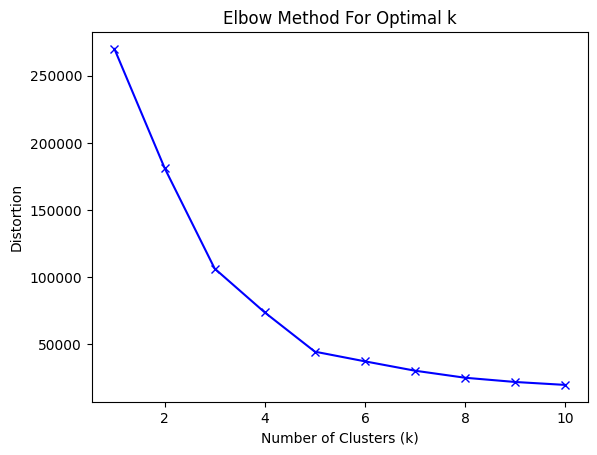

In [ ]:
data = pd.read_csv('Mall_Customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
optimal_num_clusters = 5
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(data[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

     CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0             1                  15                      39        2
1             2                  15                      81        3
2             3                  16                       6        2
3             4                  16                      77        3
4             5                  17                      40        2
..          ...                 ...                     ...      ...
195         196                 120                      79        4
196         197                 126                      28        1
197         198                 126                      74        4
198         199                 137                      18        1
199         200                 137                      83        4

[200 rows x 4 columns]


In [ ]:
centroids = kmeans.cluster_centers_
print("\nFinal Centroids:")
print(pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)']))


Final Centroids:
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           88.200000               17.114286
2           26.304348               20.913043
3           25.727273               79.363636
4           86.538462               82.128205


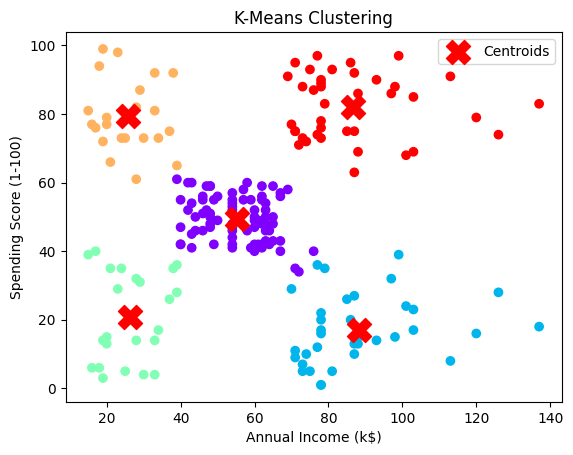

In [ ]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
import numpy as np

In [ ]:
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

In [ ]:
def custom_kmeans(data, k, max_iterations=100, tolerance=1e-4):
    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):
        clusters = assign_data_points_to_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters)
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            break

        centroids = new_centroids

    return clusters, centroids

In [ ]:
def assign_data_points_to_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
    clusters = np.argmin(distances, axis=1)
    return clusters

In [ ]:
def update_centroids(data, clusters):
    new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(len(set(clusters)))])
    return new_centroids


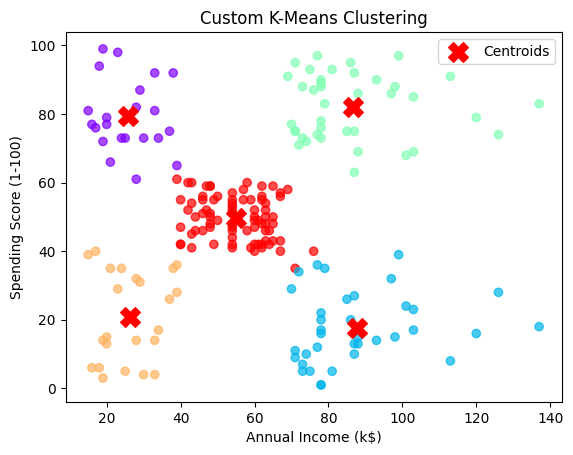

In [ ]:
data = pd.read_csv('Mall_Customers.csv')[['Annual Income (k$)', 'Spending Score (1-100)']].values
k = 5
clusters, centroids = custom_kmeans(data, k)
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='rainbow', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Custom K-Means Clustering')
plt.legend()
plt.show()


In [ ]:
print("\nFinal Centroids:")
print(pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)']))


Final Centroids:
   Annual Income (k$)  Spending Score (1-100)
0           25.727273               79.363636
1           87.750000               17.583333
2           86.538462               82.128205
3           26.304348               20.913043
4           55.087500               49.712500
